In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [2]:

train_dir = 'data/train'
val_dir = 'data/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


In [3]:

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (48,48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size = (48,48),
    batch_size = 64,
    color_mode = "grayscale",
    class_mode = 'categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [4]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=1 / 1e-6,  # Decay every step to achieve 1e-6 decay in total
    decay_rate=1.0,  # No decay, since we're manually controlling decay steps
    staircase=True)


emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (48,48,1)))
emotion_model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2,2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.compile(loss='categorical_crossentropy',optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
,metrics=['accuracy'])


In [5]:
emotion_model_info = emotion_model.fit_generator(
    train_generator,
    steps_per_epoch = 28709 // 64,
    epochs=75,
    validation_data = val_generator,
    validation_steps = 7178 // 64
)

emotion_model.save_weights('model.h5')


C:\Users\PhnaeendraAdmin\AppData\Local\Temp\ipykernel_20576\33726616.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/75


448/448 [==============================] - 570s 1s/step - loss: 1.7924 - accuracy: 0.2663 - val_loss: 1.6739 - val_accuracy: 0.3492
Epoch 2/75
448/448 [==============================] - 231s 516ms/step - loss: 1.6117 - accuracy: 0.3762 - val_loss: 1.5333 - val_accuracy: 0.4153
Epoch 3/75
448/448 [==============================] - 220s 491ms/step - loss: 1.5192 - accuracy: 0.4179 - val_loss: 1.4477 - val_accuracy: 0.4542
Epoch 4/75
448/448 [==============================] - 219s 489ms/step - loss: 1.4549 - accuracy: 0.4442 - val_loss: 1.3989 - val_accuracy: 0.4648
Epoch 5/75
448/448 [==============================] - 221s 492ms/step - loss: 1.3900 - accuracy: 0.4706 - val_loss: 1.3437 - val_accuracy: 0.4869
Epoch 6/75
448/448 [==============================] - 405s 906ms/step - loss: 1.3433 - accuracy: 0.4885 - val_loss: 1.3033 - val_accuracy: 0.5060
Epoch 7/75
448/448 [==============================] - 418s 933ms/step - loss: 1.3035 - accuracy: 0.5049 - val_loss: 1.2690 - 

In [6]:

main_accent_colour = "#b366ff"
dim_colour="darkgrey"
main_palette = ["#FBE5C0", "#DD9A30", "#F88379", "#FF6FC2", "purple", "#D086F6", "#B0D2C2", "#4C5D70", "#6FA2CE", "#382D24", "#3ACF3A", "#7D7D00"]

In [7]:

row = 48
col = 48

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate number of images in each class for training
train_count = [len(os.listdir(os.path.join(train_dir, folder))) for folder in os.listdir(train_dir)]

# Calculate number of images in each class for validation
val_count = [len(os.listdir(os.path.join(val_dir, folder))) for folder in os.listdir(val_dir)]


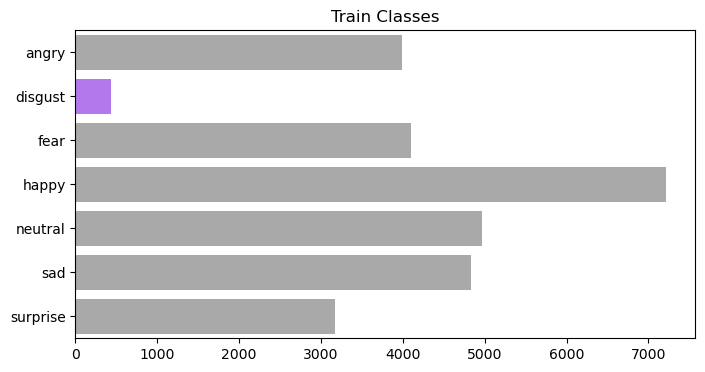

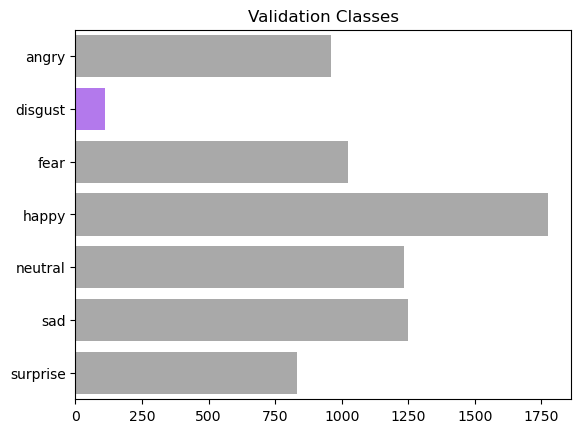

In [15]:
# Plot for training data
plt.figure(figsize=(8,4))

ax = sns.barplot(y=os.listdir(train_dir),
                 x=train_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Train Classes')

plt.show()

print()

# Plot for validation data
ax = sns.barplot(y=os.listdir(val_dir),
                 x=val_count,
                 palette=palette,
                 orientation="horizontal",
).set(title='Validation Classes')

plt.show()

print()
